
# <div align="center">Pitchfork review analysis</div>

The idea behind this analysis is to find if Pitchfork authors have a certain bias towards any genre of music and later see if the review data can help us create a model which can predict album ratings based on the combination of the following two variables:

- **Name of the author**
- **Name of the music genre/-s**

In the process of this analysis I will be also trying to answer the following questions:
- **How average review scores of different genres and artists compare throughout the years?**
- **Which of these are more likely to be labeled "Best New Music"?**
- **Who are the authors that contribute the most?**

The dataset used for this notebook was fully scraped from **www.pitchfork.com** on 11.04.2020 and the script to do so are available here: **[github.com/glbshv/Pitchfork-project](https://github.com/glbshv/Pitchfork-project)**.

The list of reviews encompasses more than 20 years of work done by Pitchfork authors and contributors. It initially contains **22.367** reviews written and published since **05.01.1999** until **11.04.2020**.

The variables extracted to peform this analysis are the following: 

- **Artist Name** 
- **Album Name**
- **Review Score**
- **Best New Music**
- **Genre**
- **Date Published**
- **Written By** 

They are located at the start of every Pitchfork review page as can be seen from an example of the [**Aphex Twin - Syro**](https://pitchfork.com/reviews/albums/19755-aphex-twin-syro/) review where mentioned variables are framed in red:
![Imgur](https://i.imgur.com/1FwKGSA.png)

To complete our task we will need the help of the following libraries:

In [1]:
import pandas as pd #to do data manipulation and table construction
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt #to access the date/time format 
from bs4 import BeautifulSoup #to be able to access html content if needed 
import urllib.request #to be able to open web-pages

Let's import the dataset with scraped pages of Pitchfork and take a look at it's shape and columns:

In [2]:
pitchfork = pd.read_csv('02_Pitchfork_reviews_11042020.csv', encoding='utf-8')
pitchfork.shape

(22367, 8)

Al already mentioned, the dataset has **22.367** scraped reviews with **8** following columns:

In [3]:
pitchfork.head(20)

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By,Review link
0,Laura Marling,Song for Our Daughter,7.6,NaN,Folk/Country,11/04/2020,Owen Myers,http://pitchfork.com/reviews/albums/laura-marl...
1,Sun Araw,Rock Sutra,7.3,NaN,Experimental,11/04/2020,Daniel Felsenthal,http://pitchfork.com/reviews/albums/sun-araw-r...
2,Joni Mitchell,Shine,8.0,NaN,Rock,11/04/2020,Sam Sodomsky,http://pitchfork.com/reviews/albums/joni-mitch...
3,The Strokes,The New Abnormal,5.7,NaN,Rock,10/04/2020,Sam Sodomsky,http://pitchfork.com/reviews/albums/the-stroke...
4,Everything Is Recorded,Friday Forever,6.1,NaN,Electronic,10/04/2020,Aimee Cliff,http://pitchfork.com/reviews/albums/everything...
5,Mosses,T.V. Sun,7.6,NaN,Folk/Country,10/04/2020,Dave Segal,http://pitchfork.com/reviews/albums/mosses-tv-...
6,Ghostie,Self Hate Wraith,7.2,NaN,Rap,10/04/2020,Mano Sundaresan,http://pitchfork.com/reviews/albums/ghostie-se...
7,Nina Simone,Fodder on My Wings,8.3,Best new reissue,Jazz / Pop/R&B,09/04/2020,Sheldon Pearce,http://pitchfork.com/reviews/albums/nina-simon...
8,Sam Hunt,Southside,7.5,NaN,Folk/Country,09/04/2020,Natalie Weiner,http://pitchfork.com/reviews/albums/sam-hunt-s...
9,Phish,Sigma Oasis,6.5,NaN,Rock,09/04/2020,Sam Sodomsky,http://pitchfork.com/reviews/albums/phish-sigm...


However, I will be looking only at the following ones: **Artist Name**, **Album Name**, **Review Score**, **Best New Music**, **Genre**, **Date Published** and **Written By**.

**Review link** was scraped as a precautionary measure if some of the links have to be re-scraped or accessed manually later. Let's remove it now because because I no longer need it:

In [4]:
pitchfork_dataset = pitchfork.iloc[:,0:7]
pitchfork_dataset.head(20)

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
0,Laura Marling,Song for Our Daughter,7.6,NaN,Folk/Country,11/04/2020,Owen Myers
1,Sun Araw,Rock Sutra,7.3,NaN,Experimental,11/04/2020,Daniel Felsenthal
2,Joni Mitchell,Shine,8.0,NaN,Rock,11/04/2020,Sam Sodomsky
3,The Strokes,The New Abnormal,5.7,NaN,Rock,10/04/2020,Sam Sodomsky
4,Everything Is Recorded,Friday Forever,6.1,NaN,Electronic,10/04/2020,Aimee Cliff
5,Mosses,T.V. Sun,7.6,NaN,Folk/Country,10/04/2020,Dave Segal
6,Ghostie,Self Hate Wraith,7.2,NaN,Rap,10/04/2020,Mano Sundaresan
7,Nina Simone,Fodder on My Wings,8.3,Best new reissue,Jazz / Pop/R&B,09/04/2020,Sheldon Pearce
8,Sam Hunt,Southside,7.5,NaN,Folk/Country,09/04/2020,Natalie Weiner
9,Phish,Sigma Oasis,6.5,NaN,Rock,09/04/2020,Sam Sodomsky


Before any analysis is done I need to inspect the data types of `pitchfork_dataset` to see if there are any errors:

In [5]:
pitchfork_dataset.dtypes

Artist Name        object
Album Name         object
Review Score      float64
Best New Music     object
Genre              object
Date Published     object
Written By         object
dtype: object

We are expecting that **Artist Name**, **Album Name**, **Best New Music** and **Genre** will contain only strings which is correct, hence the type is `object`. 

**Best New Music** will be empty most of the time because only a few albums get this recognition.

However, **Date Published** is read in as a string value. Let's transform it through `strftime()` into correct date format to be able to access each element individually - `datetime64[ns]`:

In [6]:
pitchfork_dataset['Date Published'] = pd.to_datetime(pitchfork_dataset['Date Published'], format='%d/%m/%Y')
pitchfork_dataset.dtypes

Artist Name               object
Album Name                object
Review Score             float64
Best New Music            object
Genre                     object
Date Published    datetime64[ns]
Written By                object
dtype: object

Now all columns have correct data types!

Let's start the analysis by taking a look at the genres in the `pitchfork_dataset` and if the data already allows us to perform some plotting. To do so I need to remove the duplicates from the **Genre** column first:

In [7]:
pitchfork_dataset.loc[pitchfork_dataset[['Genre']].drop_duplicates().index, :]

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
0,Laura Marling,Song for Our Daughter,7.6,NaN,Folk/Country,2020-04-11,Owen Myers
1,Sun Araw,Rock Sutra,7.3,NaN,Experimental,2020-04-11,Daniel Felsenthal
2,Joni Mitchell,Shine,8.0,NaN,Rock,2020-04-11,Sam Sodomsky
4,Everything Is Recorded,Friday Forever,6.1,NaN,Electronic,2020-04-10,Aimee Cliff
6,Ghostie,Self Hate Wraith,7.2,NaN,Rap,2020-04-10,Mano Sundaresan
...,...,...,...,...,...,...,...
20805,New Flesh,Understanding,5.5,NaN,Electronic / Experimental / Rap / Rock,2002-07-15,Brad Haywood
21114,Fred Frith,Freedom in Fragments,8.3,NaN,Experimental / Global / Rock,2002-03-20,Chris Dahlen
21396,Fred Lonberg-Holm / Jim O’Rourke / Weasel Walter,Tribute to Masayuki Takayanagi,7.9,NaN,Jazz / Experimental / Folk/Country,2001-11-28,David M. Pecoraro
21874,Therapy?,So Much for the Ten Year Plan: A Retrospective...,6.5,NaN,Electronic / Metal / Rap / Rock,2000-10-03,D. Erik Kempke


I see that there are **142** unique **Genre** values in our dataset because albums are tagged with multiple genres, as it is shown in one of the examples above from row 20,805 - **Electronic / Experimental / Rap / Rock**. This result brings in complexity that we'll need to deal with later in this analysis to acquire accurate data.

First, I need to understand how Pitchfork arranges their genre tags and if there is a list available somewhere. For our conveniece they already have that list available on several pages on the website. For example, this filter in the same review section:

![Imgur](https://i.imgur.com/AoGZAvV.png)

For ease of access I will use another link where they list all the same genres: **https://pitchfork.com/artists/**. Let's create the genre lookup table:

In [8]:
pitchfork_link = BeautifulSoup(urllib.request.urlopen('https://pitchfork.com/artists/').read(), 'lxml')
extracted_genres = pitchfork_link.find_all('h1', class_="artist-group__heading")

genre_list = []
for genre in extracted_genres:
    genre_list.append(genre.text)

pitchfork_genres = pd.DataFrame({"Genres of Pitchfork": genre_list})

#strangely Pitchfork doesn't tag the albums as "Rap/Hip-Hop" but only as "Rap" in the review section, this needs correction:
pitchfork_genres.loc[pitchfork_genres['Genres of Pitchfork'] == 'Rap/Hip-Hop'] = 'Rap'

pitchfork_genres

,Genres of Pitchfork
0,Electronic
1,Folk
2,Jazz
3,Pop/R&B
4,Rap
5,Experimental
6,Global
7,Metal
8,Rock


As observed above - there really are only **9** genres that Pitchfork staff decided to use to organize all the artists and albums but we have **142** distinct values because authors can use multiple tagging.

This means that if I want to create accurate frequency tables and calculate the average ratings correctly for each of **9** genres I will have to parse each string individually to check if it contains one of **9** genres and only then perform any calculations.

Before I proceed with this task I need to address one thing that I noticed while scraping the website - sometimes **Genre** is ommited in the review when an artist is listed as **Various Artists** or the absence can be also caused by some internal agreement among Pitchfork staff or procesual mistake that occurs when categorization of the artist/album might be challenging to the author.

For example, none of the **[Wu-Tang](https://pitchfork.com/artists/29705-wu-tang/)** albums are marked with any genre, but at the same time all albums tagged with **[Wu-Tang Clan](https://pitchfork.com/artists/4628-wu-tang-clan/)** are clearly classified as **Rap** while it is the same artist.

In [9]:
pitchfork_dataset.loc[(pitchfork_dataset['Artist Name'] == 'Wu-Tang Clan') | (pitchfork_dataset['Artist Name'] == 'Wu-Tang'), :]

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
2940,Wu-Tang,The Saga Continues,4.5,NaN,Not found,2017-10-21,Sheldon Pearce
6430,Wu-Tang Clan,A Better Tomorrow,5.9,NaN,Rap,2014-12-03,Craig Jenkins
10364,Wu-Tang,Legendary Weapons,5.0,NaN,Not found,2011-08-02,Ian Cohen
12805,Wu-Tang Clan,Wu-Tang Chamber Music,7.5,NaN,Rap,2009-07-06,Tom Breihan
13500,Wu-Tang Clan,Wu: The Story of the Wu-Tang Clan,7.5,NaN,Rap,2008-11-25,Ian Cohen
14661,Wu-Tang Clan,8 Diagrams,8.0,NaN,Rap,2007-12-11,Nate Patrin
18340,Wu-Tang Clan,Disciples of the 36 Chambers: Chapter 1,7.9,NaN,Rap,2004-11-14,Brian Howe
21098,Wu-Tang Clan,Iron Flag,7.5,NaN,Rap,2002-03-26,Christopher Dare


This is the reason why I tagged all **2,339** such records as "Not found" in **Genre** column while scraping the website. I can access these rows through the code below to provide a broader example:

In [10]:
pitchfork_dataset.loc[pitchfork_dataset['Genre'] == 'Not found']

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
22,Minor Science,Second Language,7.6,NaN,Not found,2020-04-06,Philip Sherburne
42,Lilly Hiatt,Walking Proof,7.6,NaN,Not found,2020-03-31,Stephen Thomas Erlewine
44,Cable Ties,Far Enough,6.4,NaN,Not found,2020-03-30,Arielle Gordon
166,Raspberry Bulbs,Before the Age of Mirrors,7.1,NaN,Not found,2020-02-24,Colin Joyce
247,Chubby & the Gang,Speed Kills,8.0,NaN,Not found,2020-01-29,Matthew Ismael Ruiz
...,...,...,...,...,...,...,...
22263,Various Artists,"Oh, Merge: 10 Year Anniversary Compilation",6.9,NaN,Not found,1999-07-06,Steven Byrd
22264,Quannum,Spectrum,7.5,NaN,Not found,1999-07-06,Mark Richardson
22272,Brokeback,Field Recordings from the Cook County Water Table,8.5,NaN,Not found,1999-06-20,Chip Chanko
22274,Soundtrack,Run Lola Run,4.9,NaN,Not found,1999-06-15,Sarah Zupko


It seems reasonable to me to add "Not found" to `pitchfork_genres` to later use for calculations on **Various Artists** in the `pitchfork_dataset` because their categorization follows a certain logic. The rest tagged as "Not found" seems to be random and will negatively affect the precision of the analysis. 

I want to avoid inspecting each row individually the same way I did with **Wu-Tang Clan** and it is better to delete such rows from the dataset.

Let's complete the steps described above:

In [11]:
pitchfork_genres = pitchfork_genres.append({'Genres of Pitchfork': 'Not found'}, ignore_index=True) #adding 'Not found' to pitchfork_genres
pitchfork_genres

,Genres of Pitchfork
0,Electronic
1,Folk
2,Jazz
3,Pop/R&B
4,Rap
5,Experimental
6,Global
7,Metal
8,Rock
9,Not found


Now there are **10** values in `pitchfork_genres`.

**Various Artists** occupy **776** rows of `pitchfork_dataset`:

In [12]:
pitchfork_dataset.loc[(pitchfork_dataset['Artist Name'] == 'Various Artists') & (pitchfork_dataset['Genre'] == 'Not found'), :]

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
280,Various Artists,Shall Not Fade - 4 Years of Service,7.4,NaN,Not found,2020-01-18,Jesse Dorris
291,Various Artists,Mogadisco - Dancing Mogadishu (Somalia 1972–1991),7.6,NaN,Not found,2020-01-15,Philip Sherburne
375,Various Artists,Until the End of the World (Original Motion Pi...,8.3,NaN,Not found,2019-12-09,Stephen M. Deusner
383,Various Artists,20 Years of Fabric,6.2,NaN,Not found,2019-12-06,Ben Cardew
390,Various Artists,HyperSwim,7.8,NaN,Not found,2019-12-04,Ben Cardew
...,...,...,...,...,...,...,...
22016,Various Artists,The Virgin Suicides,4.8,NaN,Not found,2000-05-12,Mark Richardson
22081,Various Artists,High Fidelity OST,7.2,NaN,Not found,2000-03-28,Michael Sandlin
22118,Various Artists,Clicks and Cuts,5.0,NaN,Not found,2000-02-08,Matt LeMay
22215,Various Artists,Everything is Nice,4.4,NaN,Not found,1999-09-14,Ryan Schreiber


Random artists tagged with 'Not found" are found in **1,563** rows:

In [13]:
pitchfork_dataset.loc[(pitchfork_dataset['Artist Name'] != 'Various Artists') & (pitchfork_dataset['Genre'] == 'Not found'), :]

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
22,Minor Science,Second Language,7.6,NaN,Not found,2020-04-06,Philip Sherburne
42,Lilly Hiatt,Walking Proof,7.6,NaN,Not found,2020-03-31,Stephen Thomas Erlewine
44,Cable Ties,Far Enough,6.4,NaN,Not found,2020-03-30,Arielle Gordon
166,Raspberry Bulbs,Before the Age of Mirrors,7.1,NaN,Not found,2020-02-24,Colin Joyce
247,Chubby & the Gang,Speed Kills,8.0,NaN,Not found,2020-01-29,Matthew Ismael Ruiz
...,...,...,...,...,...,...,...
22241,Timeout Drawer,Record of Small Histories,7.1,NaN,Not found,1999-08-03,Ryan Schreiber
22264,Quannum,Spectrum,7.5,NaN,Not found,1999-07-06,Mark Richardson
22272,Brokeback,Field Recordings from the Cook County Water Table,8.5,NaN,Not found,1999-06-20,Chip Chanko
22274,Soundtrack,Run Lola Run,4.9,NaN,Not found,1999-06-15,Sarah Zupko


This means that right size of `pitchfork_dataset` should be 22,367 - 1,563 = **20,804** when we remove untagged artists/albums:

In [14]:
pitchfork_dataset = pitchfork_dataset.drop(
    pitchfork_dataset.loc[
        (pitchfork_dataset['Artist Name'] != 'Various Artists') & (pitchfork_dataset['Genre'] == 'Not found'), 
        :].index)
pitchfork_dataset

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
0,Laura Marling,Song for Our Daughter,7.6,NaN,Folk/Country,2020-04-11,Owen Myers
1,Sun Araw,Rock Sutra,7.3,NaN,Experimental,2020-04-11,Daniel Felsenthal
2,Joni Mitchell,Shine,8.0,NaN,Rock,2020-04-11,Sam Sodomsky
3,The Strokes,The New Abnormal,5.7,NaN,Rock,2020-04-10,Sam Sodomsky
4,Everything Is Recorded,Friday Forever,6.1,NaN,Electronic,2020-04-10,Aimee Cliff
...,...,...,...,...,...,...,...
22362,Cassius,1999,4.8,NaN,Electronic,1999-01-26,James P. Wisdom
22363,Coldcut,Let Us Replay!,8.9,NaN,Electronic / Jazz,1999-01-26,James P. Wisdom
22364,Don Caballero,"Singles Breaking Up, Vol. 1",7.2,NaN,Experimental / Metal / Rock,1999-01-12,James P. Wisdom
22365,Mojave 3,Out of Tune,6.3,NaN,Rock,1999-01-12,Jason Josephes


Now `pitchfork_dataset` is cleaned from ambiguous records.

Before proceeding further, I will just make a check to make sure that all other columns contain values:

In [15]:
pitchfork_dataset.isnull().sum()

Artist Name           1
Album Name            3
Review Score          0
Best New Music    19615
Genre                 0
Date Published        0
Written By            0
dtype: int64

It looks like there is 1 value in **Artist Name** and 3 values in **Album Name** that we need to inspect.

Ironically, Daniel Pineda's project called **[NA](https://pitchfork.com/reviews/albums/21611-cellar-ep/)** was interpreted by pandas `read_csv()` function as a missing value:

In [16]:
pitchfork_dataset[pitchfork_dataset['Artist Name'].isnull()]

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
5050,NaN,Cellar EP,7.5,NaN,Electronic,2016-02-29,Kevin Lozano


Let's correct that by changing it to a string value 'NA':

In [17]:
pitchfork_dataset.loc[5050, 'Artist Name'] = 'NA'
pitchfork_dataset.loc[[5050]]

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
5050,NA,Cellar EP,7.5,NaN,Electronic,2016-02-29,Kevin Lozano


Three albums of the following artists do not have any names in the reviews as can be seen here:

- **[Nisennenmondai](https://pitchfork.com/reviews/albums/21626-na/)**
- **[Beak>](https://pitchfork.com/reviews/albums/16697-recordreview/)**
- **[Triangle](https://pitchfork.com/reviews/albums/8150-triangle/)**

This is also reflected in the dataset:

In [18]:
pitchfork_dataset[pitchfork_dataset['Album Name'].isnull()]

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
4932,Nisennenmondai,NaN,7.8,NaN,Electronic,2016-04-01,Philip Sherburne
9389,Beak>,NaN,7.3,NaN,Rock,2012-06-05,Stuart Berman
21457,Triangle,NaN,2.7,NaN,Rock,2001-11-01,Dan Kilian


Let's change the missing values to 'Untitled':

In [19]:
pitchfork_dataset['Album Name'].fillna(value='Untitled', inplace=True)
pitchfork_dataset.loc[[4932, 9389, 21457], :]

,Artist Name,Album Name,Review Score,Best New Music,Genre,Date Published,Written By
4932,Nisennenmondai,Untitled,7.8,NaN,Electronic,2016-04-01,Philip Sherburne
9389,Beak>,Untitled,7.3,NaN,Rock,2012-06-05,Stuart Berman
21457,Triangle,Untitled,2.7,NaN,Rock,2001-11-01,Dan Kilian


Now the dataset has no missing values in the columns where we aren't expecting any:

In [20]:
pitchfork_dataset.isnull().sum()

Artist Name           0
Album Name            0
Review Score          0
Best New Music    19615
Genre                 0
Date Published        0
Written By            0
dtype: int64

This looks really good and I can start to analyze and plot the data.

First of all, I am interested in what is the average score of all the reviews to get the baseline for anything that we look at in the future:

In [21]:
print(np.round(pitchfork_dataset['Review Score'].mean(), 1))

7.1


**7.1** actually looks really surprising knowing the reputation of Pitchfork and that they allow the staff to be quite categorical and subjective in their reviews. On the other hand, since they are really selective in what they review this might be caused by a predisposition to look only at albums that are expected to be good or at least worth listening to.

Let's see if this is different throughout the last 20 years and or if there are count of reviews is influencing this somehow:

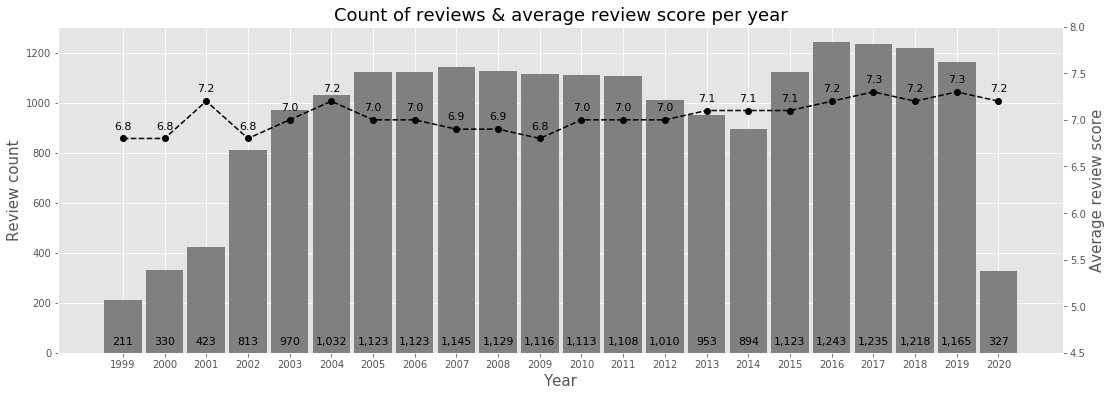

In [24]:
#creating a pivot table with review counts and average review scores
review_count = pd.pivot_table(
    pitchfork_dataset, 
    values=['Album Name', 'Review Score'],
    index=[pitchfork_dataset['Date Published'].dt.year], 
    aggfunc={
        'Album Name': 'count',
        'Review Score': 'mean'
    }
)

x = review_count.index #years will be plotted on x axis
y1 = review_count['Album Name'] #review counts are bars on y label
y2 = np.round(review_count['Review Score'], 1) #average review score are plotted on a line

#plotting the review count bar chart
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot()
plt.style.use('ggplot')
ax1.set_title('Count of reviews & average review score per year', fontsize=18)
plt.bar(x, y1, width=.9, color='gray')
plt.xticks(x, fontsize=10)
plt.yticks(fontsize=10)
for index, data  in zip(x, y1):
    count = '{:,}'.format(data)
    ax1.annotate(count, (index, 35), ha='center', fontsize=11)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Review count', fontsize=15)

#plotting the average score line
ax2 = ax1.twinx()
ax2.set_ylabel('Average review score', fontsize=15)
ax2.grid(False)
ax2.set_ylim(4.5, 8)
ax2.plot(x, y2, color='black', linestyle='dashed', marker='o')
plt.yticks(fontsize=10)
for index, data in zip(x, y2):
    rating = "{}".format(data)
    ax2.annotate(rating, (index, data+.1), ha='center', fontsize=11)
    
plt.show()

The chart does not show any signifficant difference throughout the years and if review counts are strongly affecting the average review scores. Seems like after Pitchfork was aquired by Condé Nast in 2015 they are reviewing ~100 albums per month and the quality of music is improving.

Let's try to look at distribution of album reviews and average scores by genre. Since Pitchfork is tagging albums with multiple genres it would seem logical to parse `pitchfork_dataset['Genre']` column and do the calculation for each individual genre. Let's plot this:

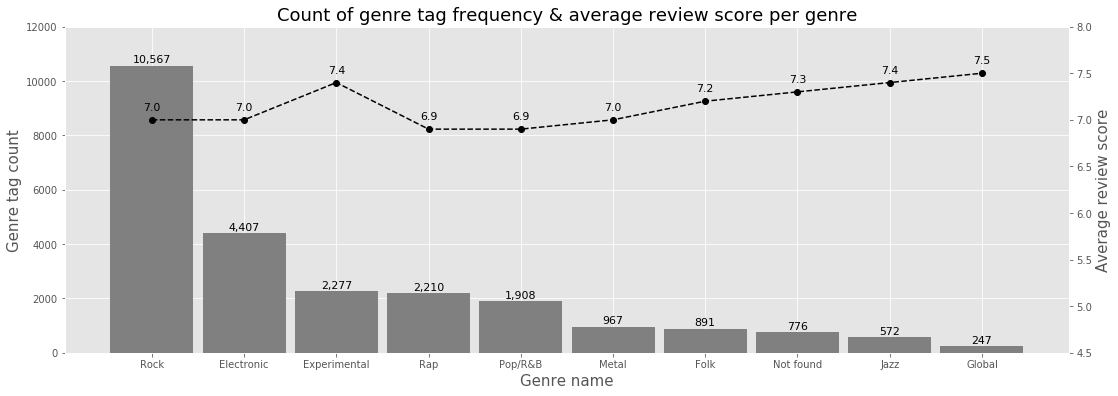

In [26]:
#a loop to create 3 lists with required data
genre_name = []
genre_count = []
genre_score = []
for genre in list(pitchfork_genres['Genres of Pitchfork']):
    for index, data in pitchfork_dataset.iterrows():
        if genre in data['Genre']:
            genre_name.append(genre)
            genre_count.append(int(1))
            genre_score.append(data['Review Score'])

#dataframe with extracted values 
genre_df = pd.DataFrame({
    'Genre': genre_name,
    'Count': genre_count,
    'Score': genre_score})

#pivot table for plotting
genre_pivot = pd.pivot_table(
    genre_df,
    values={'Count', 'Score'},
    index='Genre',
    aggfunc={'Count': np.sum,
            'Score': np.mean}).sort_values(by='Count', ascending=False)

x = genre_pivot.index #artist name
y1 = genre_pivot['Count'] #count of albums tagged with a genre
y2 = np.round(genre_pivot['Score'], 1) #average review score of a genre

#plotting the genre tag count
fig_2 = plt.figure(figsize=(18,6))
ax1 = fig_2.add_subplot()
plt.style.use('ggplot')
ax1.set_title('Count of genre tag frequency & average review score per genre', fontsize=18)
plt.bar(x, y1, width=.9, color='gray')
plt.xticks(x, fontsize=10)
ax1.set_ylim(0, 12000)
plt.yticks(fontsize=10)
for index, data  in zip(x, y1):
    count = '{:,}'.format(data)
    ax1.annotate(count, (index, data + 100), ha='center', fontsize=11)
plt.xlabel('Genre name', fontsize=15)
plt.ylabel('Genre tag count', fontsize=15)

#plotting the average score line
ax2 = ax1.twinx()
ax2.set_ylabel('Average review score', fontsize=15)
ax2.grid(False)
ax2.set_ylim(4.5, 8)
ax2.plot(x, y2, color='black', linestyle='dashed', marker='o')
plt.yticks(fontsize=10)
for index, data in zip(x, y2):
    rating = "{}".format(data)
    ax2.annotate(rating, (index, data+.1), ha='center', fontsize=11)
    
plt.show()